# Data analysis for CSP 11B

Available results: `Calgary CAU-Kiel CSIRO CTC-CNE DARTS GEOS1 GEOS2 IFPEN1 IFPEN2 KFUPM OpenGoSim1 OpenGoSim2 OpenGoSim3 OPM1 OPM2 OPM3 OPM4 Pau-Inria PFLOTRAN Rice1 Rice2 SINTEF1 SINTEF2 SINTEF3 SINTEF4 SLB Stuttgart1 Stuttgart2 Stuttgart3 Stuttgart4 TetraTech1 TetraTech2 UT-CSEE1 UT-CSEE2`.

## Computing the SPE11 distance

Run the data analysis and compute the SPE11 distance between all selected results.
With the `-g` option, sparse data are selected as submitted by the respective
participants, where `-f` specifies the corresponding folder for all results.
Alternatively, the `-c` options take, for selected quantities, values
post-processed from the submitted dense data that reside in the folder
specified by `-t`, particularly, `-cAB` related to Boxes A and B (imm/mob data),
`-cSealA` and `-cSealB` separately for Boxes A and B (seal data), `-cC` related to Box C.

The results can be displayed and stored in the output folder, defined by the `-o` option. This includes a distance matrix which will be used for further detailed analysis below.

In [1]:
%matplotlib inline
%run ../analysis/compute_spe11_distance.py \
-v spe11b \
-f ../shared_folder/data \
-t ../shared_folder/evaluation \
-o output/spe11b \
-g Calgary CAU-Kiel CSIRO CTC-CNE DARTS GEOS1 GEOS2 \
   IFPEN1 IFPEN2 KFUPM OpenGoSim1 OpenGoSim2 OpenGoSim3 \
   OPM1 OPM2 OPM3 OPM4 Pau-Inria PFLOTRAN Rice1 Rice2 SINTEF1 \
   SINTEF2 SINTEF3 SINTEF4 SLB Stuttgart1 Stuttgart2 Stuttgart3 \
   Stuttgart4 TetraTech1 TetraTech2 UT-CSEE1 UT-CSEE2 \
-cAB Calgary CTC-CNE OpenGoSim1 OpenGoSim2 OpenGoSim3 \
-cC Calgary CAU-Kiel CTC-CNE PFLOTRAN SINTEF1 SINTEF2 SINTEF3 SINTEF4 \
    SLB Stuttgart1 Stuttgart2 Stuttgart3 Stuttgart4 \
-cSealA PFLOTRAN \
-cSealB PFLOTRAN \
-cBCO2 Pau-Inria PFLOTRAN


Distance matrix stored in output\spe11b\spe11b_distance_matrix.csv
Statistics stored in output\spe11b\spe11b_statistics.csv


## Inspecting the distance matrix
The above computation has stored the distance matrix to file `output/spe11b/spe11b_distance_matrix.csv`. We can fetch and display it.

In [2]:
import pandas as pd
df = pd.read_csv('output/spe11b/spe11b_distance_matrix.csv', index_col=0)

# Uncomment for a quick look at the distance matrix
#df

The script `analyze_distance_matrix` loads the computed SPE11 distance matrix and allows for further inspection, including visualization, extracting values, minimal distances.

We start with visualizing the full distance matrix. For this, provide the option `-option show-distance-matrix`.

Saved heatmap to output\spe11b\spe11b_heatmap_distance_matrix.png.


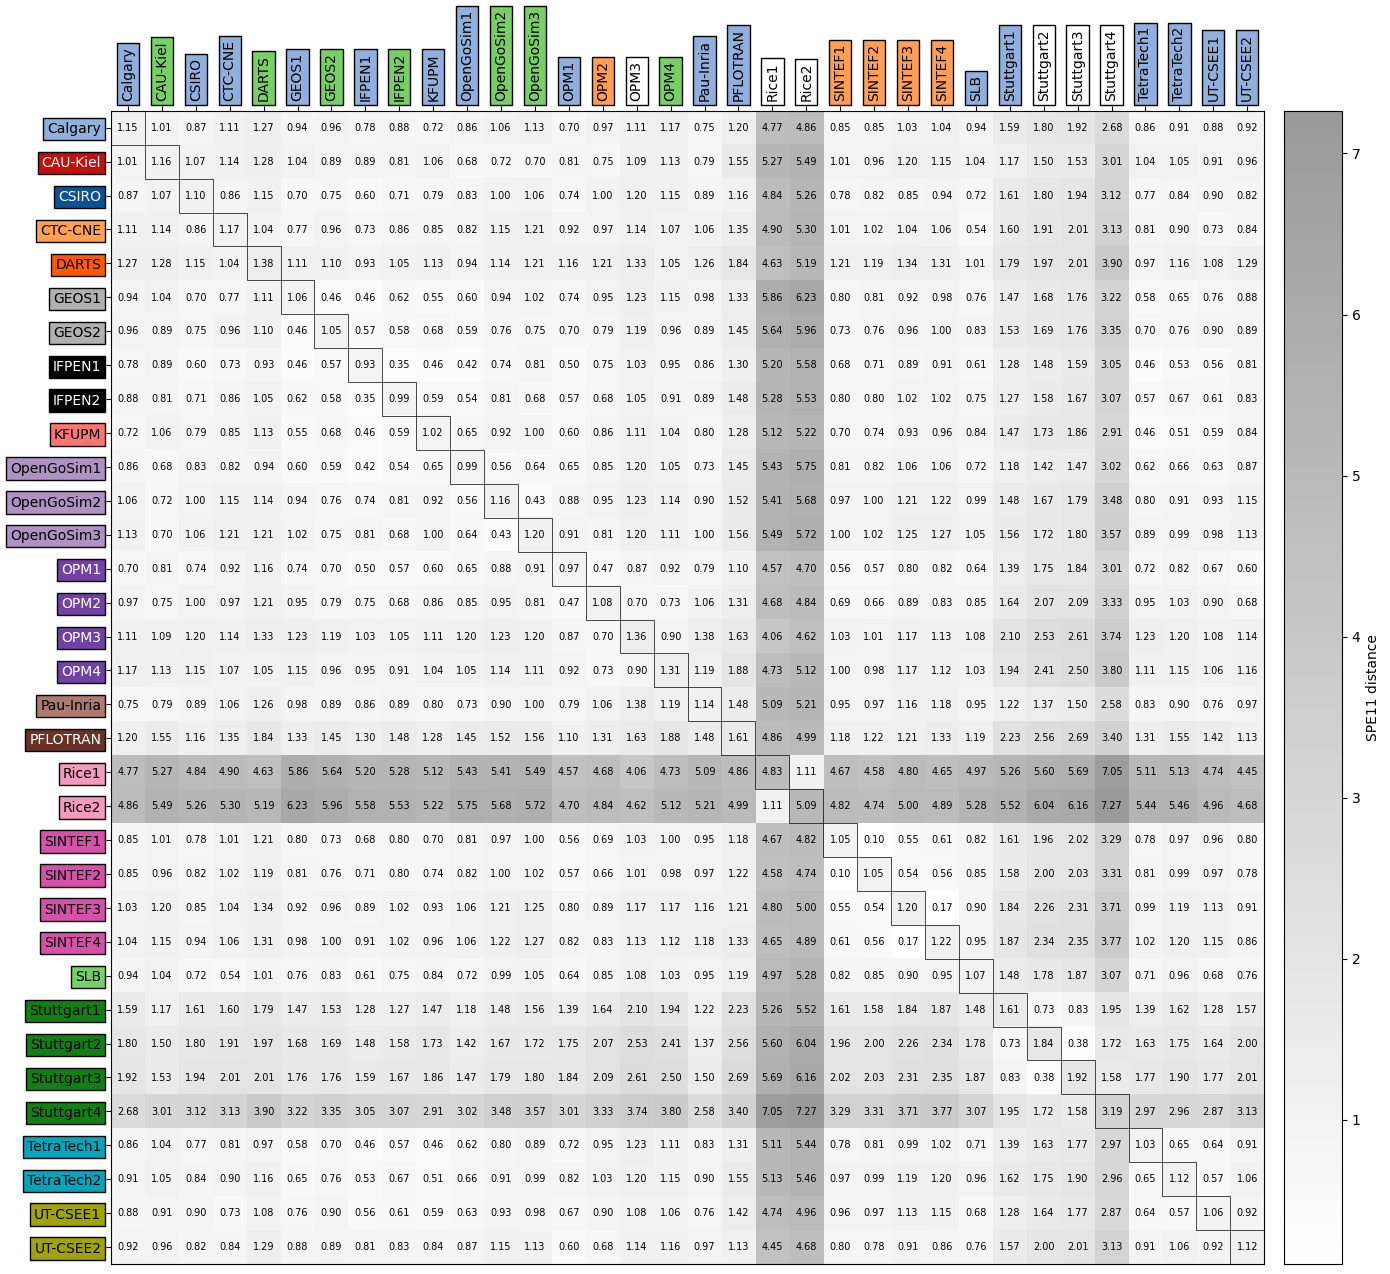

<Figure size 640x480 with 0 Axes>

In [3]:
%run ../analysis/analyze_distance_matrix.py \
-option show-distance-matrix \
-v spe11b \
-o output/spe11b

The respective image of the distance matrix is printed to file `output/spe11b/spe11b_distance_matrix.png`.

By specifying single groups through `-g`, one can extract a subset of the distance matrix for closer inspection.  NOTE: The next code block overwrites the image.

In [4]:
# %run ../analysis/analyze_distance_matrix.py \
#-option show-distance-matrix \
#-v spe11b \
#-o output/spe11b \
#-g IFPEN1 OPM4 SINTEF2 Rice2

## Extracting single distances
We can extract single pairwise distances through the option `-option print-distances` together with a selection of groups thorugh `-g`. 

### Example analysis - same groups using different simulators
We can inspect the distances between the different submissions from same groups using different simulator (TetraTech and UT-CSEE).

In [5]:
%run ../analysis/analyze_distance_matrix.py \
-option print-distances \
-v spe11b \
-o output/spe11b \
-g TetraTech1 TetraTech2 UT-CSEE1 UT-CSEE2

Distance between TetraTech1 and TetraTech2: 0.6455242573757186
Distance between TetraTech1 and UT-CSEE1: 0.6401436594842532
Distance between TetraTech1 and UT-CSEE2: 0.9144325602819514
Distance between TetraTech2 and UT-CSEE1: 0.5670976000120732
Distance between TetraTech2 and UT-CSEE2: 1.062025672962301
Distance between UT-CSEE1 and UT-CSEE2: 0.9154673669969337


### Partition in subgroups - different groups using same simulators
By the repeated use of `-g`, we can also specify a partitioning and only ask for the comparison within these groupings.

As an example we analyze the base case submissions based on DuMuX  (`Pau-Inria` and `Stuttgart1`) as well as those based on SLB-IX (`CTC-CNE`, `SLB`, `UT-CSEE1`).

In [6]:
%run ../analysis/analyze_distance_matrix.py \
-option print-distances \
-v spe11b \
-o output/spe11b \
-g Pau-Inria Stuttgart1 \
-g CTC-CNE SLB UT-CSEE1

Distance between Pau-Inria and Stuttgart1: 1.2197558452671875
Distance between CTC-CNE and SLB: 0.5396296637586431
Distance between CTC-CNE and UT-CSEE1: 0.7290038410575179
Distance between SLB and UT-CSEE1: 0.6789721315356476


## Medians and correlations
The SPE11 distance uses scalings for each considered reporting quantity. It is essentially based on a median value of the distances of each type of quantity. Then the total SPE11 distance agglomerates the single distances, resulting in the natural question how well the single distances correlate to the global distance. The Pearson correlation coefficient (PCC) offers a quantitative measure. As part of the computation of the SPE11 distance, these statistics are recorded in the output folder as `spe11b_statistics.csv`

In [7]:
import pandas as pd
df = pd.read_csv('output/spe11b/spe11b_statistics.csv')
df

,Unnamed: 0,Median,PCC
0,mobA,1.618635e+11,0.887174
1,immA,2.574286e+09,0.517597
2,dissA,5.576113e+10,0.774185
3,mobB,5.361290e+10,0.313851
4,immB,1.421694e+10,-0.042297
5,dissB,2.729014e+10,0.790791
6,mC,6.971021e+07,0.319656
7,sealTot,1.360803e+10,0.930151
8,boundaryCO2,6.046847e+08,0.294295
9,early_pressure_l2s,3.790073e+09,0.873255


## Visualization of clustering
The distance matrix provides means for linkage clustering vilsualized by a dendrogram. Using the option `-option show-clustering` the dendrogram is displayed and stored to file.

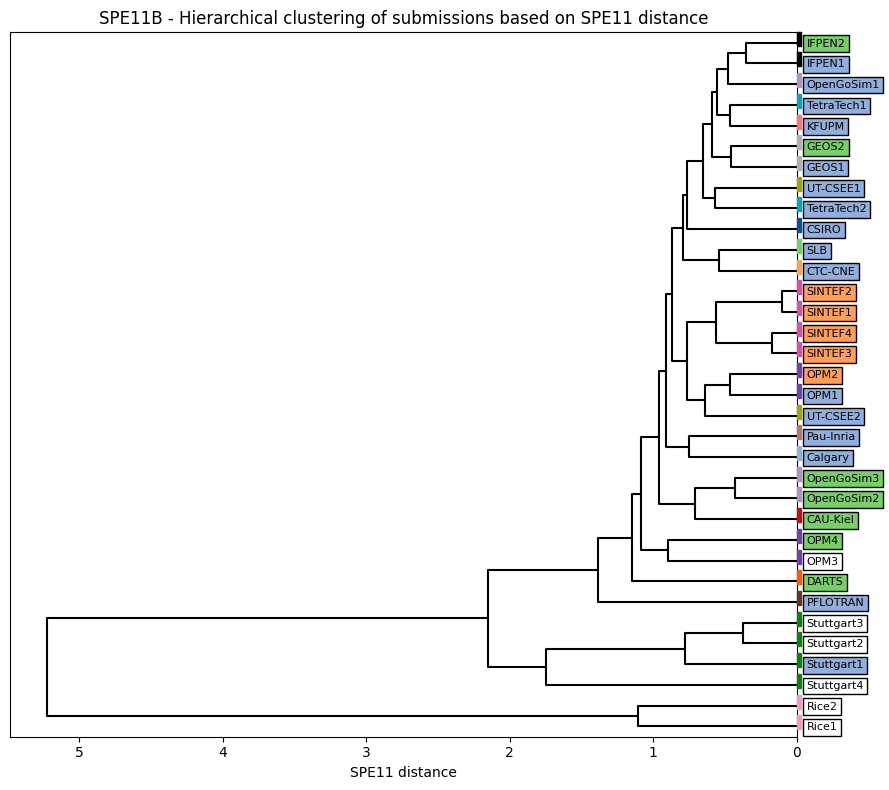

<Figure size 640x480 with 0 Axes>

In [8]:
%run ../analysis/analyze_distance_matrix.py \
-option show-clustering \
-v spe11b \
-o output/spe11b

# Finding the smallest mean distance (median result)
We define the median submission to be the submission with lowest average mean to all other submissions. For this we call the script `analyze_distance_matrix` and specify the option `-option find-min-mean-distance`. We can make a selection of groups selected for the analysis using `-g`.

In [9]:
%run ../analysis/analyze_distance_matrix.py \
-option find-min-mean-distance \
-v spe11b \
-o output/spe11b \
-g Calgary CAU-Kiel CSIRO CTC-CNE DARTS GEOS1 GEOS2 \
   IFPEN1 IFPEN2 KFUPM OpenGoSim1 OpenGoSim2 OpenGoSim3 \
   OPM1 OPM2 OPM3 OPM4 Pau-Inria PFLOTRAN Rice1 Rice2 SINTEF1 \
   SINTEF2 SINTEF3 SINTEF4 SLB Stuttgart1 Stuttgart2 Stuttgart3 \
   Stuttgart4 TetraTech1 TetraTech2 UT-CSEE1 UT-CSEE2


--------------------------------------------------------------------------------
MINIMUM AG MEAN DISTANCE:
--------------------------------------------------------------------------------

Within the group:
[['Calgary', 'CAU-Kiel', 'CSIRO', 'CTC-CNE', 'DARTS', 'GEOS1', 'GEOS2', 'IFPEN1', 'IFPEN2', 'KFUPM', 'OpenGoSim1', 'OpenGoSim2', 'OpenGoSim3', 'OPM1', 'OPM2', 'OPM3', 'OPM4', 'Pau-Inria', 'PFLOTRAN', 'Rice1', 'Rice2', 'SINTEF1', 'SINTEF2', 'SINTEF3', 'SINTEF4', 'SLB', 'Stuttgart1', 'Stuttgart2', 'Stuttgart3', 'Stuttgart4', 'TetraTech1', 'TetraTech2', 'UT-CSEE1', 'UT-CSEE2']]
With distance 0.9340326985564986 and std 0.7178757328155352.
The group with the smallest mean distance to all other participants is:
IFPEN1



## Finding the smallest pair-wise distance
By using the option `-option find-min-distance`, we can search for the smallest distance between two distinct submissions among the provided groups. Again, we can restrict the analysis to a subset using `-g`.

In [10]:
%run ../analysis/analyze_distance_matrix.py \
-option find-min-distance \
-v spe11b \
-o output/spe11b \
-g Calgary CAU-Kiel CSIRO CTC-CNE DARTS GEOS1 GEOS2 \
   IFPEN1 IFPEN2 KFUPM OpenGoSim1 OpenGoSim2 OpenGoSim3 \
   OPM1 OPM2 OPM3 OPM4 Pau-Inria PFLOTRAN Rice1 Rice2 SINTEF1 \
   SINTEF2 SINTEF3 SINTEF4 SLB Stuttgart1 Stuttgart2 Stuttgart3 \
   Stuttgart4 TetraTech1 TetraTech2 UT-CSEE1 UT-CSEE2


--------------------------------------------------------------------------------
MINIMUM DISTANCE:
--------------------------------------------------------------------------------

The minimum distance is 0.1038558093312422 between SINTEF1 and SINTEF2.


## Finding the smallest group-wise distance
By adding multiple groups through repeated use of `-g`, one introduces a collection of subgroups. For the option `-option find-min-distance`, the use of multiple subgroups, allows for excluding group-intern comparisons within the single selections. Using this, one can analyze e.g. the smallest distance between submissions from different groups.

In [11]:
%run ../analysis/analyze_distance_matrix.py \
-option find-min-distance \
-v spe11b \
-o output/spe11b \
-g Calgary \
-g CAU-Kiel \
-g CSIRO \
-g CTC-CNE \
-g DARTS \
-g GEOS1 GEOS2 \
-g IFPEN1 IFPEN2 \
-g KFUPM \
-g OpenGoSim1 OpenGoSim2 OpenGoSim3 \
-g OPM1 OPM2 OPM3 OPM4 \
-g Pau-Inria \
-g PFLOTRAN \
-g Rice1 Rice2 \
-g SINTEF1 SINTEF2 SINTEF3 SINTEF4 \
-g SLB \
-g Stuttgart1 Stuttgart2 Stuttgart3 Stuttgart4 \
-g TetraTech1 TetraTech2 \
-g UT-CSEE1 UT-CSEE2


--------------------------------------------------------------------------------
MINIMUM DISTANCE:
--------------------------------------------------------------------------------

The minimum distance is 0.4192226954629864 between IFPEN1 and OpenGoSim1.


# Variability analysis (all submissions)

We can compute the variability in a single group. For this, we specify the group through `-g`. For example, we can compute the overall variability.

In [12]:
%run ../analysis/variability_analysis.py \
-v spe11b \
-o output/spe11b \
-g Calgary CAU-Kiel CSIRO CTC-CNE DARTS GEOS1 GEOS2 \
   IFPEN1 IFPEN2 KFUPM OpenGoSim1 OpenGoSim2 OpenGoSim3 \
   OPM1 OPM2 OPM3 OPM4 Pau-Inria PFLOTRAN Rice1 Rice2 SINTEF1 \
   SINTEF2 SINTEF3 SINTEF4 SLB Stuttgart1 Stuttgart2 Stuttgart3 \
   Stuttgart4 TetraTech1 TetraTech2 UT-CSEE1 UT-CSEE2


--------------------------------------------------------------------------------
VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 34 groups
[['Calgary', 'CAU-Kiel', 'CSIRO', 'CTC-CNE', 'DARTS', 'GEOS1', 'GEOS2', 'IFPEN1', 'IFPEN2', 'KFUPM', 'OpenGoSim1', 'OpenGoSim2', 'OpenGoSim3', 'OPM1', 'OPM2', 'OPM3', 'OPM4', 'Pau-Inria', 'PFLOTRAN', 'Rice1', 'Rice2', 'SINTEF1', 'SINTEF2', 'SINTEF3', 'SINTEF4', 'SLB', 'Stuttgart1', 'Stuttgart2', 'Stuttgart3', 'Stuttgart4', 'TetraTech1', 'TetraTech2', 'UT-CSEE1', 'UT-CSEE2']]
is 1.3183054006941615 +- 0.07068353884641332 (margin of error) based on 
with a standard deviation of 1.1598223963839733.


Similarly, we can ask for the baseline variability. For this, we need to specify the baseline group as input. For SPE11B, these are `Calgary`, `CSIRO`, `CTC-CNE`, `GEOS1`, `IFPEN1`, `KFUPM`, `OpenGoSim1`, `OPM1`, `Pau-Inria`, `PFLOTRAN`, `SLB`, `Stuttgart1`, `Tetratech1`, `Tetratech2`, `UT-CSEE1`, `UT-CSEE2`.

In [13]:
%run ../analysis/variability_analysis.py \
-v spe11b \
-o output/spe11b \
-g Calgary CSIRO CTC-CNE GEOS1 IFPEN1 KFUPM OPM1 OpenGoSim1 Pau-Inria \
PFLOTRAN SLB Stuttgart1 TetraTech1 TetraTech2 UT-CSEE1 UT-CSEE2


--------------------------------------------------------------------------------
VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 16 groups
[['Calgary', 'CSIRO', 'CTC-CNE', 'GEOS1', 'IFPEN1', 'KFUPM', 'OPM1', 'OpenGoSim1', 'Pau-Inria', 'PFLOTRAN', 'SLB', 'Stuttgart1', 'TetraTech1', 'TetraTech2', 'UT-CSEE1', 'UT-CSEE2']]
is 0.8918411581391896 +- 0.05137594197429407 (margin of error) based on 
with a standard deviation of 0.30415756761197876.


# Statistical analysis (comparison of variability)

## Baseline variability vs. overall variability

We can compute p-values of null-hypotheses comparing the variability of two groups, quantifying the statistical significance. E.g. we analyze whether the base case group has smaller variability than the overall variability. For this, we specify `-g-smaller` and `g-greater`, here being the base case group and all groups, respectively. 

In [14]:
%run ../analysis/variability_analysis.py \
-v spe11b \
-o output/spe11b \
-g-smaller Calgary CSIRO CTC-CNE GEOS1 IFPEN1 KFUPM OPM1 OpenGoSim1 Pau-Inria PFLOTRAN SLB Stuttgart1 \
TetraTech1 TetraTech2 UT-CSEE1 UT-CSEE2 \
-g-greater Calgary CAU-Kiel CSIRO CTC-CNE DARTS GEOS1 GEOS2 \
   IFPEN1 IFPEN2 KFUPM OpenGoSim1 OpenGoSim2 OpenGoSim3 \
   OPM1 OPM2 OPM3 OPM4 Pau-Inria PFLOTRAN Rice1 Rice2 SINTEF1 \
   SINTEF2 SINTEF3 SINTEF4 SLB Stuttgart1 Stuttgart2 Stuttgart3 \
   Stuttgart4 TetraTech1 TetraTech2 UT-CSEE1 UT-CSEE2


--------------------------------------------------------------------------------
COMPARATIVE VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 16 groups
[['Calgary', 'CSIRO', 'CTC-CNE', 'GEOS1', 'IFPEN1', 'KFUPM', 'OPM1', 'OpenGoSim1', 'Pau-Inria', 'PFLOTRAN', 'SLB', 'Stuttgart1', 'TetraTech1', 'TetraTech2', 'UT-CSEE1', 'UT-CSEE2']]
is 0.8918411581391896 +- 0.05137594197429407 (margin of error) based on 
with a standard deviation of 0.30415756761197876.

The mean distance among the 34 groups
[['Calgary', 'CAU-Kiel', 'CSIRO', 'CTC-CNE', 'DARTS', 'GEOS1', 'GEOS2', 'IFPEN1', 'IFPEN2', 'KFUPM', 'OpenGoSim1', 'OpenGoSim2', 'OpenGoSim3', 'OPM1', 'OPM2', 'OPM3', 'OPM4', 'Pau-Inria', 'PFLOTRAN', 'Rice1', 'Rice2', 'SINTEF1', 'SINTEF2', 'SINTEF3', 'SINTEF4', 'SLB', 'Stuttgart1', 'Stuttgart2', 'Stuttgart3', 'Stuttgart4', 'TetraTech1', 'TetraTech2', 'UT-CSEE1', 'UT-CSEE2']]
is 1.3183054006941615 +- 0.070683538846413

## Commercial vs. academic/open-source simulators
Similarly, we can copute the p-value of the comparison of commercial and academic/open-source against all base case groups. 

The commercial group is given by: `CTC-CNE`, `KFUPM`, `SLB`, `TetraTech2`, `UT-CSEE1`, `UT-CSEE2`.

In [15]:
%run ../analysis/variability_analysis.py \
-v spe11b \
-o output/spe11b \
-g-smaller CTC-CNE KFUPM SLB TetraTech2 UT-CSEE1 UT-CSEE2 \
-g-greater Calgary CSIRO CTC-CNE GEOS1 \
   IFPEN1 KFUPM OpenGoSim1 \
   OPM1 Pau-Inria PFLOTRAN \
   SLB Stuttgart1 \
   TetraTech1 TetraTech2 UT-CSEE1 UT-CSEE2


--------------------------------------------------------------------------------
COMPARATIVE VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 6 groups
[['CTC-CNE', 'KFUPM', 'SLB', 'TetraTech2', 'UT-CSEE1', 'UT-CSEE2']]
is 0.7718224491775351 +- 0.08073288086553909 (margin of error) based on 
with a standard deviation of 0.15952913422631643.

The mean distance among the 16 groups
[['Calgary', 'CSIRO', 'CTC-CNE', 'GEOS1', 'IFPEN1', 'KFUPM', 'OpenGoSim1', 'OPM1', 'Pau-Inria', 'PFLOTRAN', 'SLB', 'Stuttgart1', 'TetraTech1', 'TetraTech2', 'UT-CSEE1', 'UT-CSEE2']]
is 0.8918411581391895 +- 0.05137594197429407 (margin of error) based on 
with a standard deviation of 0.3041575676119789.

The hypothesis that the variability within
[['CTC-CNE', 'KFUPM', 'SLB', 'TetraTech2', 'UT-CSEE1', 'UT-CSEE2']]
is smaller than the variability within
[['Calgary', 'CSIRO', 'CTC-CNE', 'GEOS1', 'IFPEN1', 'KFUPM', 'OpenGoSim1', 'OPM1

The academic/open-source group is given by: `Calgary`, `CSIRO`, `GEOS1`, `IFPEN1`, `OpenGoSim1`, `OPM1`, `Pau-Inria`, `PFLOTRAN`, `Stuttgart1`, `TetraTech1`.

In [16]:
%run ../analysis/variability_analysis.py \
-v spe11b \
-o output/spe11b \
-g-smaller Calgary CSIRO GEOS1 IFPEN1 OpenGoSim1 \
   OPM1 Pau-Inria PFLOTRAN Stuttgart1 TetraTech1 \
-g-greater Calgary CSIRO CTC-CNE GEOS1 \
   IFPEN1  KFUPM OpenGoSim1 \
   OPM1 Pau-Inria PFLOTRAN \
   SLB Stuttgart1 \
   TetraTech1 TetraTech2 UT-CSEE1 UT-CSEE2


--------------------------------------------------------------------------------
COMPARATIVE VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 10 groups
[['Calgary', 'CSIRO', 'GEOS1', 'IFPEN1', 'OpenGoSim1', 'OPM1', 'Pau-Inria', 'PFLOTRAN', 'Stuttgart1', 'TetraTech1']]
is 0.94774030084776 +- 0.0962480018844819 (margin of error) based on 
with a standard deviation of 0.36739155457889294.

The mean distance among the 16 groups
[['Calgary', 'CSIRO', 'CTC-CNE', 'GEOS1', 'IFPEN1', 'KFUPM', 'OpenGoSim1', 'OPM1', 'Pau-Inria', 'PFLOTRAN', 'SLB', 'Stuttgart1', 'TetraTech1', 'TetraTech2', 'UT-CSEE1', 'UT-CSEE2']]
is 0.8918411581391895 +- 0.05137594197429407 (margin of error) based on 
with a standard deviation of 0.3041575676119789.

The hypothesis that the variability within
[['Calgary', 'CSIRO', 'GEOS1', 'IFPEN1', 'OpenGoSim1', 'OPM1', 'Pau-Inria', 'PFLOTRAN', 'Stuttgart1', 'TetraTech1']]
is smaller than the var

Thus, we conclude statistical significance for that the academic simulators show a lower variability than the baseline variability.

# Multiple subsets

We can use the same tools to analyze variability differences for multiple subsets. By multiple use of `-g`, subsets of groups can be defined to consider only their pair-wise distances, still merged with other pair-wise distances. 

### Example analysis: Same groups using different simulators
This allows to a fine-grained analysis asking, e.g., to analyze the variability in the submissions from same groups but using different simulators. `TetraTech1` and `TetraTech2`, as well as `UT-CSEE1` and `UT-CSEE2` use different simulators. Only their internal distances are of interest.

In [17]:
%run ../analysis/variability_analysis.py \
-v spe11b \
-o output/spe11b \
-g TetraTech1 TetraTech2 \
-g UT-CSEE1 UT-CSEE2


--------------------------------------------------------------------------------
VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 4 groups
[['TetraTech1', 'TetraTech2'], ['UT-CSEE1', 'UT-CSEE2']]
is 0.7804958121863261 +- 0.18706103128078977 (margin of error) based on 
with a standard deviation of 0.13497155481060752.


Similarly, multi-level groups can be provided for variability comparisons. We can for instance compare the group-intern variability of `TetraTech` and `UT-CSEE` against all base case submissions.

In [18]:
%run ../analysis/variability_analysis.py \
-v spe11b \
-o output/spe11b \
-g-smaller TetraTech1 TetraTech2 \
-g-smaller UT-CSEE1 UT-CSEE2 \
-g-greater Calgary CSIRO CTC-CNE GEOS1 \
   IFPEN1  KFUPM OpenGoSim1 \
   OPM1 Pau-Inria PFLOTRAN \
   SLB Stuttgart1 \
   TetraTech1 TetraTech2 UT-CSEE1 UT-CSEE2


--------------------------------------------------------------------------------
COMPARATIVE VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 4 groups
[['TetraTech1', 'TetraTech2'], ['UT-CSEE1', 'UT-CSEE2']]
is 0.7804958121863261 +- 0.18706103128078977 (margin of error) based on 
with a standard deviation of 0.13497155481060752.

The mean distance among the 16 groups
[['Calgary', 'CSIRO', 'CTC-CNE', 'GEOS1', 'IFPEN1', 'KFUPM', 'OpenGoSim1', 'OPM1', 'Pau-Inria', 'PFLOTRAN', 'SLB', 'Stuttgart1', 'TetraTech1', 'TetraTech2', 'UT-CSEE1', 'UT-CSEE2']]
is 0.8918411581391895 +- 0.05137594197429407 (margin of error) based on 
with a standard deviation of 0.3041575676119789.

The hypothesis that the variability within
[['TetraTech1', 'TetraTech2'], ['UT-CSEE1', 'UT-CSEE2']]
is smaller than the variability within
[['Calgary', 'CSIRO', 'CTC-CNE', 'GEOS1', 'IFPEN1', 'KFUPM', 'OpenGoSim1', 'OPM1', 'Pau-Inria', 'PFLOT

### Example analysis: Different groups using the same simulator
We revist the analysis of the groups using the same simulators (DuMuX and SLB-IX), now in the light of a variability analysis.

In [19]:
%run ../analysis/variability_analysis.py \
-v spe11b \
-o output/spe11b \
-g-smaller Pau-Inria Stuttgart1 \
-g-smaller CTC-CNE SLB UT-CSEE1 \
-g-greater Calgary CSIRO CTC-CNE GEOS1 \
   IFPEN1  KFUPM OpenGoSim1 \
   OPM1 Pau-Inria PFLOTRAN \
   SLB Stuttgart1 \
   TetraTech1 TetraTech2 UT-CSEE1 UT-CSEE2


--------------------------------------------------------------------------------
COMPARATIVE VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 5 groups
[['Pau-Inria', 'Stuttgart1'], ['CTC-CNE', 'SLB', 'UT-CSEE1']]
is 0.7865640870596883 +- 0.24331217284781792 (margin of error) based on 
with a standard deviation of 0.24842955413986323.

The mean distance among the 16 groups
[['Calgary', 'CSIRO', 'CTC-CNE', 'GEOS1', 'IFPEN1', 'KFUPM', 'OpenGoSim1', 'OPM1', 'Pau-Inria', 'PFLOTRAN', 'SLB', 'Stuttgart1', 'TetraTech1', 'TetraTech2', 'UT-CSEE1', 'UT-CSEE2']]
is 0.8918411581391895 +- 0.05137594197429407 (margin of error) based on 
with a standard deviation of 0.3041575676119789.

The hypothesis that the variability within
[['Pau-Inria', 'Stuttgart1'], ['CTC-CNE', 'SLB', 'UT-CSEE1']]
is smaller than the variability within
[['Calgary', 'CSIRO', 'CTC-CNE', 'GEOS1', 'IFPEN1', 'KFUPM', 'OpenGoSim1', 'OPM1', 'Pau-Inri

# Community-based mesh refinement study
Various participants performed a group-intern mesh refinement study. The script `mesh_refinement_study.py` offers plotting functionality to investigate its impact. For this, the options `-g`, `-m`, `-l` allow for selecting submissions, inform on the used mesh size, and add a label for later plotting. Moreover, to put the study into context, the mean and margin of error, of a subset of these results can be highlighted through the option `-variability-analysis` followed by a list of respective labels, and `-reference-group` allows to add further information on the variability within some reference group.

The groups `GEOS`, `IFPEN`, `OpenGoSim`, `OPM`, and `SINTEF` submitted results with consecutively refined meshes. We put their results in context to the subset of moderately refined meshes (all besides `OPM` which used strong refinement) and all base case submissions.

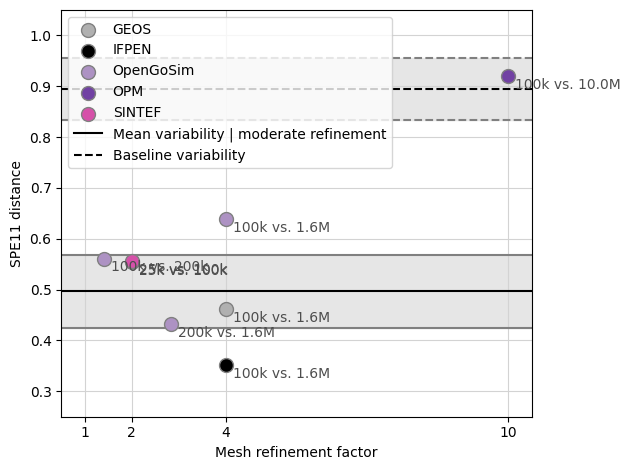

Mesh refinement study plot saved under output\spe11b\spe11b_mesh_refinement_study.png.


<Figure size 640x480 with 0 Axes>

In [20]:
%run ../analysis/mesh_refinement_study.py \
-v spe11b \
-o output/spe11b \
-g GEOS1 GEOS2 \
-m 100000 1600000 \
-l GEOS \
-g IFPEN1 IFPEN2 \
-m 100000 1600000 \
-l IFPEN \
-g OpenGoSim1 OpenGoSim2 OpenGoSim3 \
-m 100000 200000 1600000 \
-l OpenGoSim \
-g OPM1 OPM4 \
-m 100000 10000000 \
-l OPM \
-g SINTEF1 SINTEF3 \
-m 25000 100000 \
-l SINTEF \
-g SINTEF2 SINTEF4 \
-m 25000 100000 \
-l SINTEF \
-variability-analysis GEOS1 GEOS2 \
-variability-analysis IFPEN1 IFPEN2 \
-variability-analysis OpenGoSim1 OpenGoSim2 \
-variability-analysis SINTEF1 SINTEF3 \
-variability-analysis SINTEF2 SINTEF4 \
-reference-group Calgary CSIRO CTC-CNE GEOS1 IFPEN1 KFUPM OPM1 OpenGoSim1 \
Pau-Inria PFLOTRAN SLB Stuttgart1 TetraTech1 UT-CSEE1

We zoom in on the strongest mesh refinement.

In [21]:
%run ../analysis/analyze_distance_matrix.py \
-option print-distances \
-v spe11b \
-o output/spe11b \
-g OPM1 OPM4

Distance between OPM1 and OPM4: 0.9192010029269198


And conduct a variability analysis for all other moderate mesh refinements.

In [22]:
%run ../analysis/variability_analysis.py \
-v spe11b \
-o output/spe11b \
-g-smaller GEOS1 GEOS2 \
-g-smaller IFPEN1 IFPEN2 \
-g-smaller OpenGoSim1 OpenGoSim2 \
-g-smaller OpenGoSim1 OpenGoSim3 \
-g-smaller OpenGoSim2 OpenGoSim3 \
-g-smaller SINTEF1 SINTEF3 \
-g-smaller SINTEF2 SINTEF4 \
-g-greater Calgary CSIRO CTC-CNE GEOS1 \
   IFPEN1  KFUPM OpenGoSim1 \
   OPM1 Pau-Inria PFLOTRAN \
   SLB Stuttgart1 \
   TetraTech1 TetraTech2 UT-CSEE1 UT-CSEE2


--------------------------------------------------------------------------------
COMPARATIVE VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 14 groups
[['GEOS1', 'GEOS2'], ['IFPEN1', 'IFPEN2'], ['OpenGoSim1', 'OpenGoSim2'], ['OpenGoSim1', 'OpenGoSim3'], ['OpenGoSim2', 'OpenGoSim3'], ['SINTEF1', 'SINTEF3'], ['SINTEF2', 'SINTEF4']]
is 0.5076595599177092 +- 0.0667205264966888 (margin of error) based on 
with a standard deviation of 0.09006424512935418.

The mean distance among the 16 groups
[['Calgary', 'CSIRO', 'CTC-CNE', 'GEOS1', 'IFPEN1', 'KFUPM', 'OpenGoSim1', 'OPM1', 'Pau-Inria', 'PFLOTRAN', 'SLB', 'Stuttgart1', 'TetraTech1', 'TetraTech2', 'UT-CSEE1', 'UT-CSEE2']]
is 0.8918411581391895 +- 0.05137594197429407 (margin of error) based on 
with a standard deviation of 0.3041575676119789.

The hypothesis that the variability within
[['GEOS1', 'GEOS2'], ['IFPEN1', 'IFPEN2'], ['OpenGoSim1', 'OpenGoSim2'], [

Similarly we can analyze the variability among the 1.6M cell (refined) submissions in comparison to the base case submissions.

In [23]:
%run ../analysis/variability_analysis.py \
-v spe11b \
-o output/spe11b \
-g-smaller GEOS2 IFPEN2 OpenGoSim3 \
-g-greater Calgary CSIRO CTC-CNE GEOS1 \
   IFPEN1  KFUPM OpenGoSim1 \
   OPM1 Pau-Inria PFLOTRAN \
   SLB Stuttgart1 \
   TetraTech1 TetraTech2 UT-CSEE1 UT-CSEE2


--------------------------------------------------------------------------------
COMPARATIVE VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 3 groups
[['GEOS2', 'IFPEN2', 'OpenGoSim3']]
is 0.6724627667298425 +- 0.07660264120383387 (margin of error) based on 
with a standard deviation of 0.06769370742806602.

The mean distance among the 16 groups
[['Calgary', 'CSIRO', 'CTC-CNE', 'GEOS1', 'IFPEN1', 'KFUPM', 'OpenGoSim1', 'OPM1', 'Pau-Inria', 'PFLOTRAN', 'SLB', 'Stuttgart1', 'TetraTech1', 'TetraTech2', 'UT-CSEE1', 'UT-CSEE2']]
is 0.8918411581391895 +- 0.05137594197429407 (margin of error) based on 
with a standard deviation of 0.3041575676119789.

The hypothesis that the variability within
[['GEOS2', 'IFPEN2', 'OpenGoSim3']]
is smaller than the variability within
[['Calgary', 'CSIRO', 'CTC-CNE', 'GEOS1', 'IFPEN1', 'KFUPM', 'OpenGoSim1', 'OPM1', 'Pau-Inria', 'PFLOTRAN', 'SLB', 'Stuttgart1', 'TetraTech1', '